In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [14]:
df = pd.read_csv("../data/processed/autojudge_dataset.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (9287, 5)


,description,input_description,output_description,difficulty_class,difficulty_score
0,John gave Jack a very hard problem. He wrote a...,First line contains a positive integer N (1 ≤ ...,"Output exactly three lines, the steps Jack nee...",Hard,2500
1,Due to the recent popularity of the Deep learn...,The first line of input contains N (1 ≤ N ≤ 10...,"Output a single integer, the number of paths D...",Hard,2000
2,Bill is a famous mathematician in BubbleLand. ...,The first line contains one integer number n (...,Output contains n distinct integers separated ...,Hard,2100
3,The competitors of Bubble Cup X gathered after...,"The first line contains four integers: V, E, N...",Output a single integer that represents the mi...,Hard,2100
4,John has just bought a new car and is planning...,"In the first line, a positive integer N (1 ≤ N...","Output one number, the answer to the problem m...",Hard,2100


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9287 entries, 0 to 9286
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   description         9287 non-null   object
 1   input_description   9204 non-null   object
 2   output_description  9102 non-null   object
 3   difficulty_class    9287 non-null   object
 4   difficulty_score    9287 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 362.9+ KB


In [ ]:
df.isnull().sum()

description             0
input_description      83
output_description    185
difficulty_class        0
difficulty_score        0
text_length           187
dtype: int64

In [17]:
# Rows with missing input or output
df[df["input_description"].isnull() | df["output_description"].isnull()].shape

(187, 5)

### Handling Missing Input/Output Descriptions

Some problems were found to have missing input or output descriptions.
Since the task requires both input and output text, such problems were excluded.

A cleaned dataset was created by removing these incomplete entries and used
for all subsequent modeling.


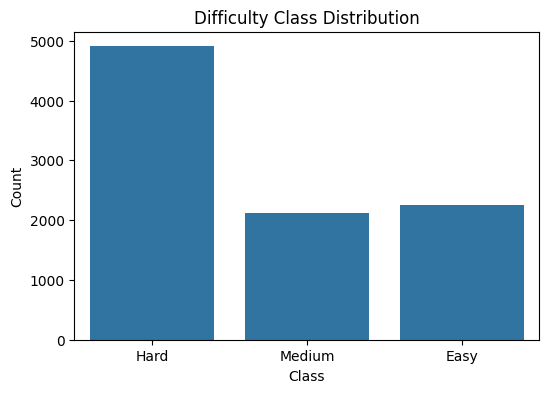

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="difficulty_class", data=df)
plt.title("Difficulty Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Class Imbalance Observation

The dataset shows a clear class imbalance:

- Hard problems are significantly more frequent than Easy and Medium problems.
- This imbalance is expected in competitive programming datasets, where harder problems are more abundant.

If left unaddressed, a classification model would be biased towards predicting the majority class (Hard),
leading to poor recall for Easy and Medium problems.

To mitigate this issue, class imbalance handling techniques such as class weighting and synthetic oversampling
(SMOTE) will be applied during model training.


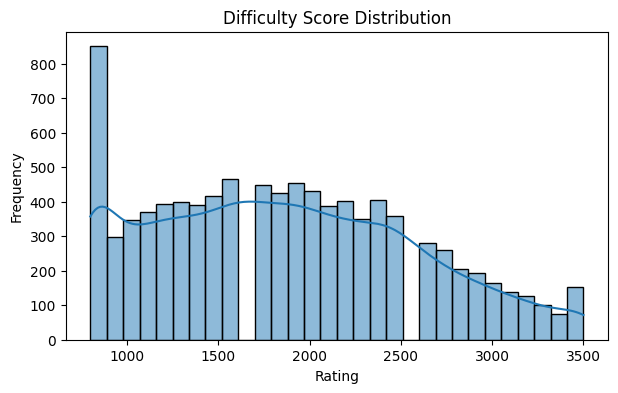

In [19]:
plt.figure(figsize=(7,4))
sns.histplot(df["difficulty_score"], bins=30, kde=True)
plt.title("Difficulty Score Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

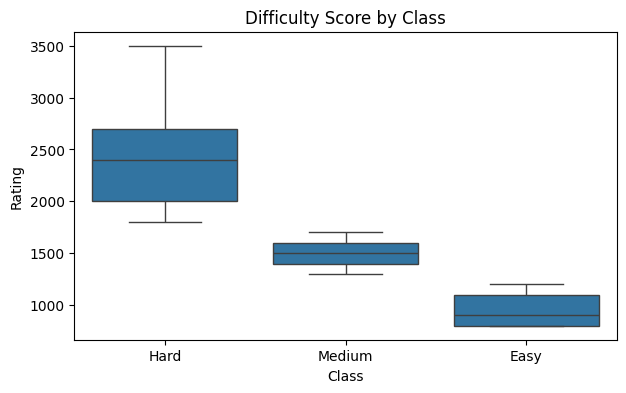

In [20]:
plt.figure(figsize=(7,4))
sns.boxplot(x="difficulty_class", y="difficulty_score", data=df)
plt.title("Difficulty Score by Class")
plt.xlabel("Class")
plt.ylabel("Rating")
plt.show()

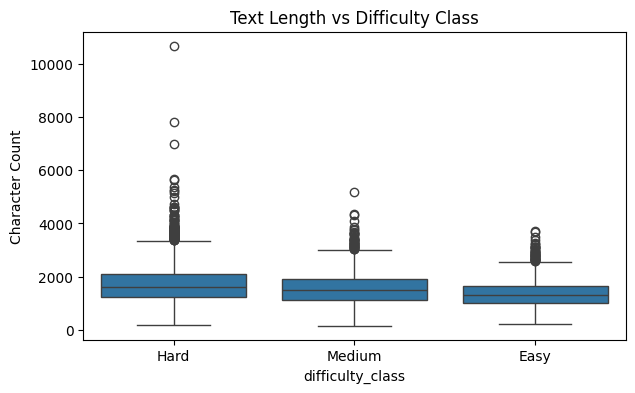

In [21]:
df["text_length"] = (
    df["description"].str.len() +
    df["input_description"].str.len() +
    df["output_description"].str.len()
)

plt.figure(figsize=(7,4))
sns.boxplot(x="difficulty_class", y="text_length", data=df)
plt.title("Text Length vs Difficulty Class")
plt.ylabel("Character Count")
plt.show()

## EDA Summary

- The dataset contains 9,287 programming problems with both categorical and numerical difficulty labels.
- Difficulty classes (Easy, Medium, Hard) are reasonably distributed.
- Numerical difficulty scores increase consistently across classes.
- Text length shows a clear correlation with difficulty, motivating the use of text-based features.
- No significant missing values were observed.

This dataset is suitable for both classification and regression tasks.
